<a href="https://colab.research.google.com/github/heyitzrizki/final-project-ds49-group3/blob/main/eda%20%26%20preprocessing/eda_%26_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Connect to GitHub

## 0.1 Import Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import pprint
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from datetime import datetime
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 0.2 Load Dataset

In [114]:
url = 'https://raw.githubusercontent.com/heyitzrizki/final-project-ds49-group3/refs/heads/main/data/dataset.csv'
df = pd.read_csv(url)
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557,1239,33.00,14.00,21.00
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,1400,1400,1.00,2.00,2.00
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.00,1,1900,1,1900,1900,1.00,0.00,0.00
3,3.00,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.00,6,6900,5,600,1800,1.00,1.00,2.00
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.00,3,3900,3,1100,1600,6.00,6.00,9.00


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [116]:
#Change format object to date_time

df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['market_id'] = df['market_id'].astype('object')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  object        
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197428 non-null  object        
 4   store_primary_category    192668 non-null  object        
 5   order_protocol            196433 non-null  float64       
 6   total_items               197428 non-null  int64         
 7   subtotal                  197428 non-null  int64         
 8   num_distinct_items        197428 non-null  int64         
 9   min_item_price            197428 non-null  int64         
 10  max_item_price            197428 non-null  int64         
 11  total_onshift_partners    181166 non-null  float64       
 12  to

# 1. Exploratory Data Analysis

## 1.1 Check Null Values

In [118]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [119]:
# Percentage of missing value for each column
missing_percent = df.isnull().sum()/df.shape[0]*100
missing_percent

,0
market_id,0.50
created_at,0.00
actual_delivery_time,0.00
store_id,0.00
store_primary_category,2.41
order_protocol,0.50
total_items,0.00
subtotal,0.00
num_distinct_items,0.00
min_item_price,0.00


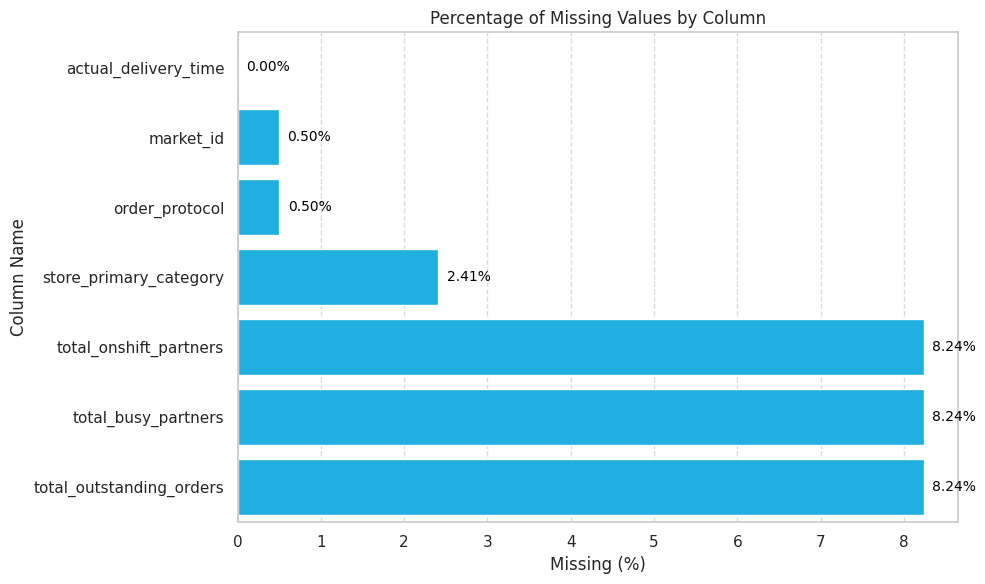

In [120]:
# Create new DataFrame for plot
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=True)
missing_df = pd.DataFrame({'column_name': missing_percent.index, 'missing (%)': missing_percent.values})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='missing (%)', y='column_name', data=missing_df, color='deepskyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Missing (%)')
plt.ylabel('Column Name')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(missing_df['missing (%)']):
    plt.text(
        value + 0.1,
        index,
        f"{value:.2f}%",
        va='center',
        fontsize=10,
        color='black'
    )
plt.tight_layout()
plt.show()

## 1.2 Check Duplicate Data

In [121]:
df_duplicate = df.copy()

In [122]:
df.duplicated().sum()

np.int64(0)

There are no DUPLICATED DATA

## 1.3 Check Unique Values

### 1.3.1 Check Data Shape

In [123]:
df.shape

(197428, 14)

### 1.3.2 Check Data Type

In [124]:
df.dtypes

,0
market_id,object
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,object
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64


### 1.3.3 Check Data Stats

In [125]:
df.describe()

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197428,197421,"196,433.00","197,428.00","197,428.00","197,428.00","197,428.00","197,428.00","181,166.00","181,166.00","181,166.00"
mean,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,2.88,3.20,"2,682.33",2.67,686.22,"1,159.59",44.81,41.74,58.05
min,2014-10-19 05:24:15,2015-01-21 15:58:11,1.00,1.00,0.00,1.00,-86.00,0.00,-4.00,-5.00,-6.00
25%,2015-01-29 02:32:42,2015-01-29 03:22:29,1.00,2.00,"1,400.00",1.00,299.00,800.00,17.00,15.00,17.00
50%,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3.00,3.00,"2,200.00",2.00,595.00,"1,095.00",37.00,34.00,41.00
75%,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,4.00,4.00,"3,395.00",3.00,949.00,"1,395.00",65.00,62.00,85.00
max,2015-02-18 06:00:44,2015-02-19 22:45:31,7.00,411.00,"27,100.00",20.00,"14,700.00","14,700.00",171.00,154.00,285.00
std,NaN,NaN,1.50,2.67,"1,823.09",1.63,522.04,558.41,34.53,32.15,52.66


1. min of min_item_price is -86? Impossible.
2. min value of total_onshift_partners, total_busy_partners, and total_outstanding_orders are negative? Does not make sense.

# 2. Data Preprocessing

### 2.1. Handling Outliers

In [126]:
# Identify the Rows with Any Negative Value
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Filter rows where any numerical column has a negative value
negative_rows = df[(df[numerical_cols] < 0).any(axis=1)]

# Display those rows
negative_rows.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
790,1.00,2015-01-29 02:59:28,2015-01-29 03:44:09,c56a4706337730e0e15da875405fa1c5,fast,4.00,3,1003,3,-86,1066,24.00,29.00,38.00
1351,2.00,2015-02-06 05:26:55,2015-02-06 06:15:41,f806c5d2707545d718717be03e69a8d4,fast,4.00,35,1786,4,-1,488,33.00,36.00,52.00
4989,1.00,2015-02-18 00:36:21,2015-02-18 01:12:28,f937c8fddbe66ab03c563f16d5cfa50c,smoothie,2.00,2,1940,1,840,856,11.00,14.00,-2.00
6034,3.00,2015-02-14 01:48:58,2015-02-14 03:00:13,5faa4ad014bbddf9ae4006a0f03085e0,american,1.00,2,3538,2,1238,1606,-2.00,2.00,10.00
7997,1.00,2015-02-08 15:41:45,2015-02-08 16:35:01,226d1f15ecd35f784d2a20c3ecf56d7f,sandwich,3.00,1,1514,1,1116,1063,1.00,-1.00,3.00


In [127]:
# Logic-based invalid value detection
invalid_condition = (
    (df['min_item_price'] < 0) |
    (df['total_onshift_partners'] < 0) |
    (df['total_busy_partners'] < 0) |
    (df['total_outstanding_orders'] < 0)
)

# Drop or replace with NaN
df.loc[invalid_condition, ['min_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']] = np.nan


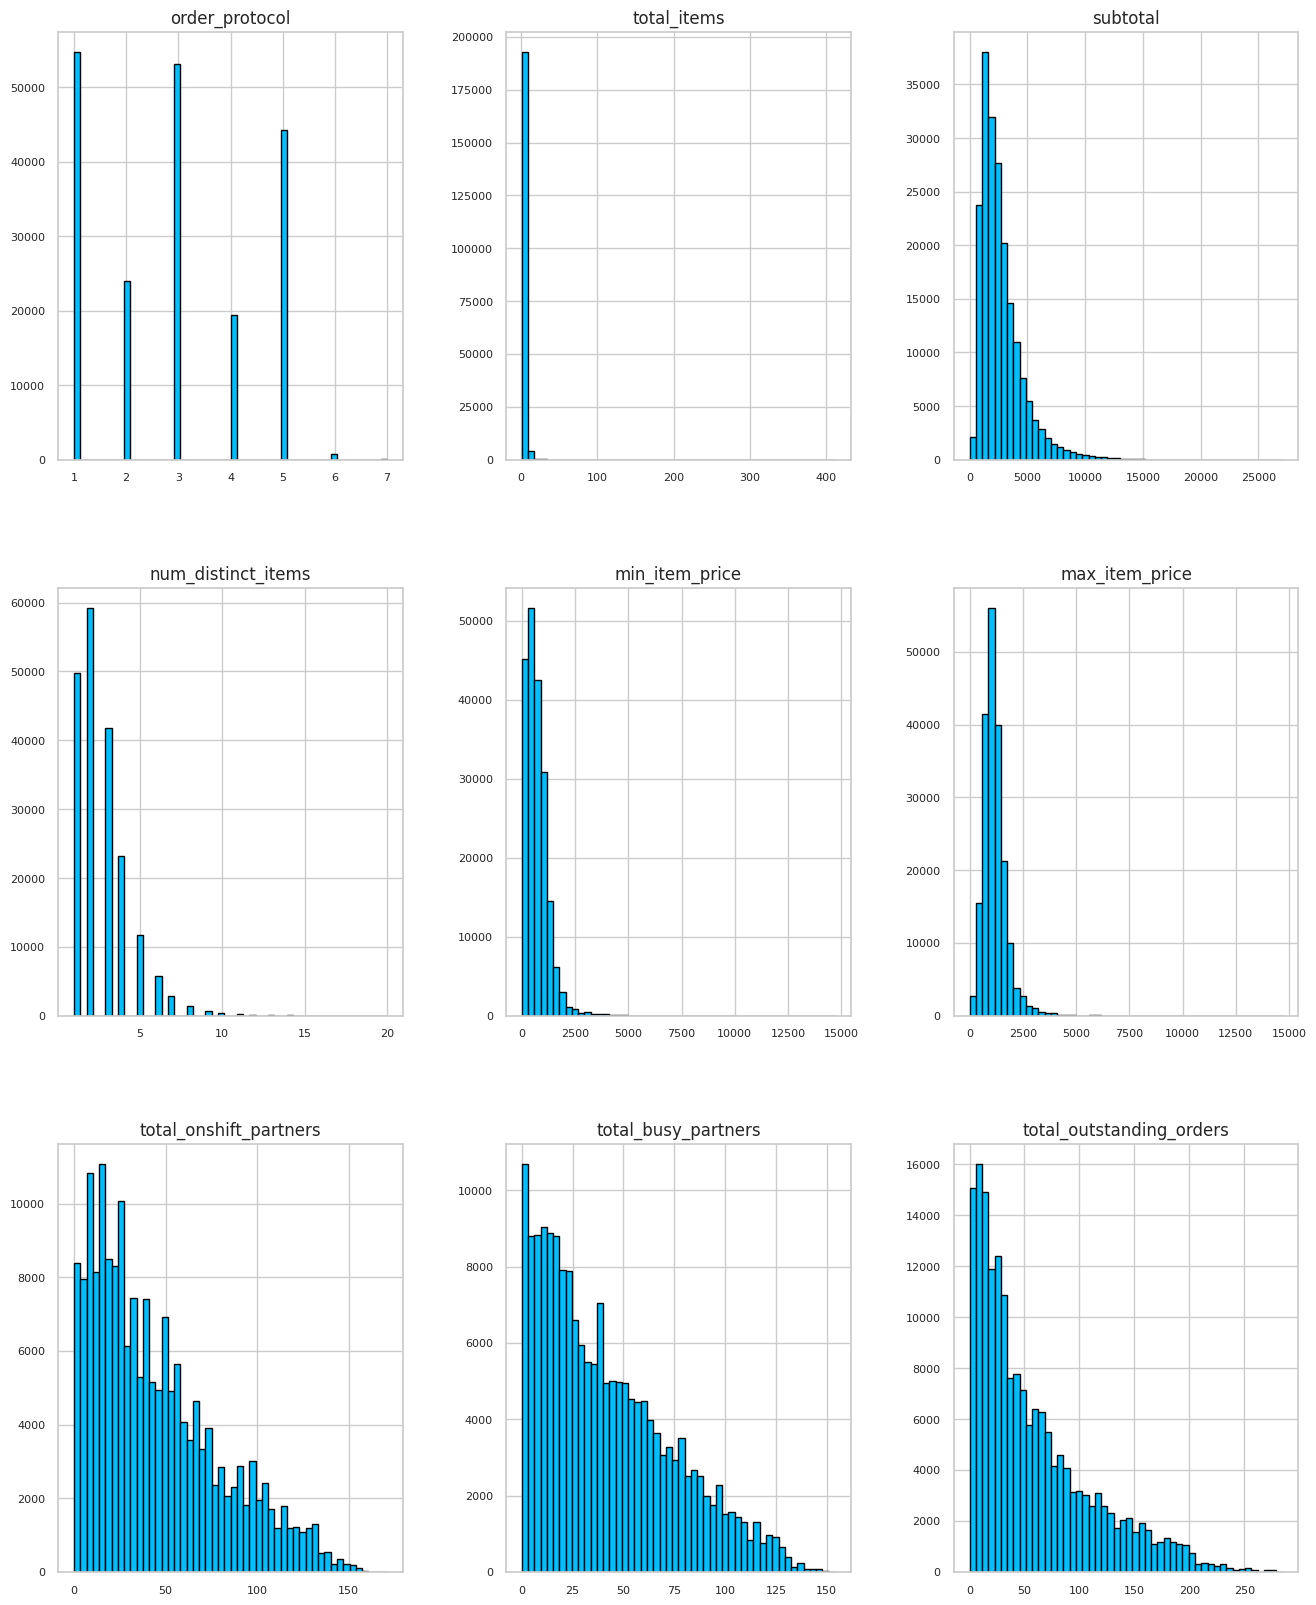

In [128]:
df_num = df.select_dtypes(exclude=["object", "datetime64[ns]"])

fig_ = df_num.hist(
    figsize=(16, 20),
    bins=50,
    color="deepskyblue",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

In [129]:
df['total_busy_partners'].skew()

np.float64(0.7821394529428061)

right skewed

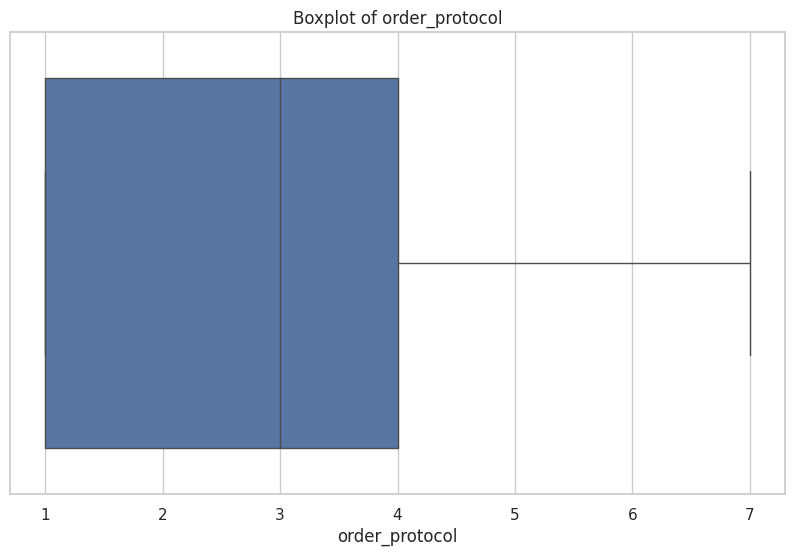

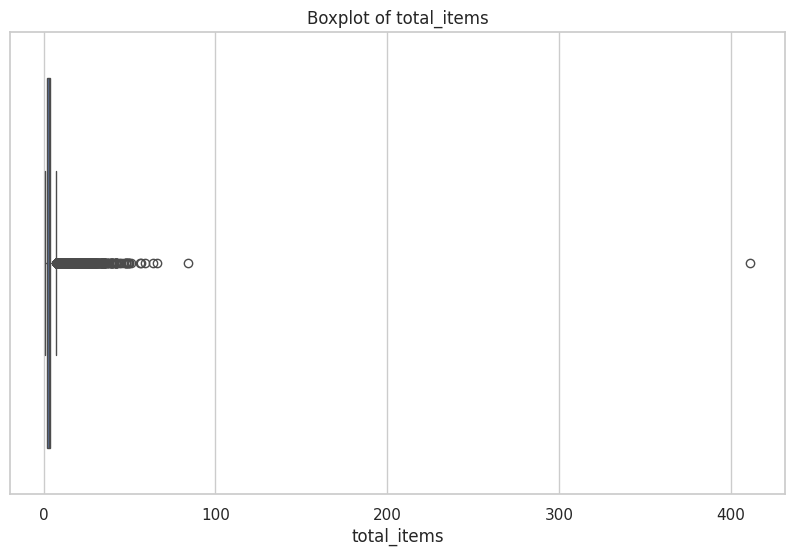

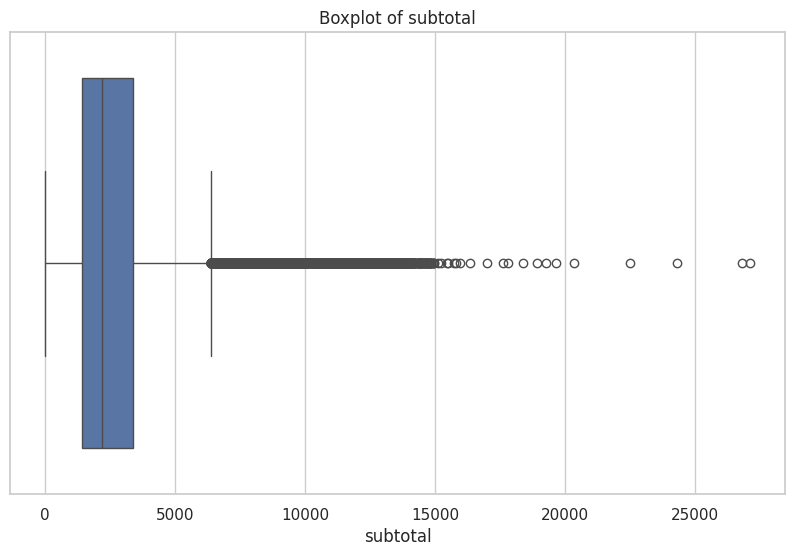

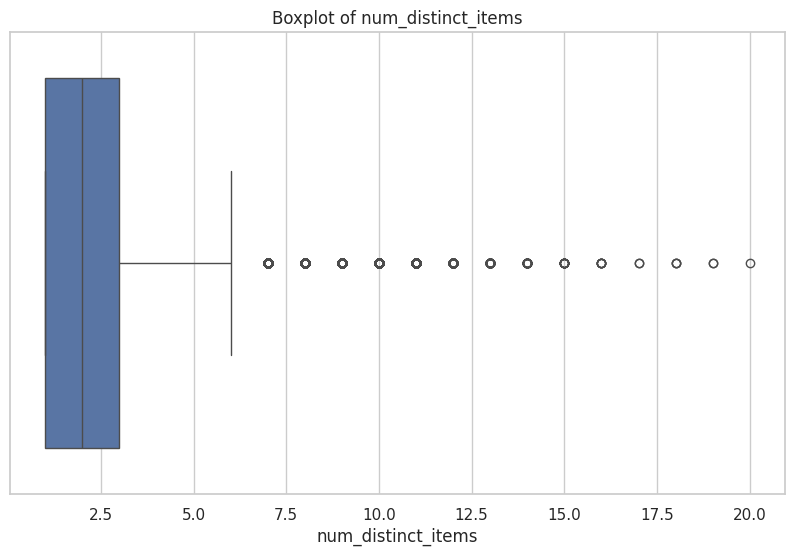

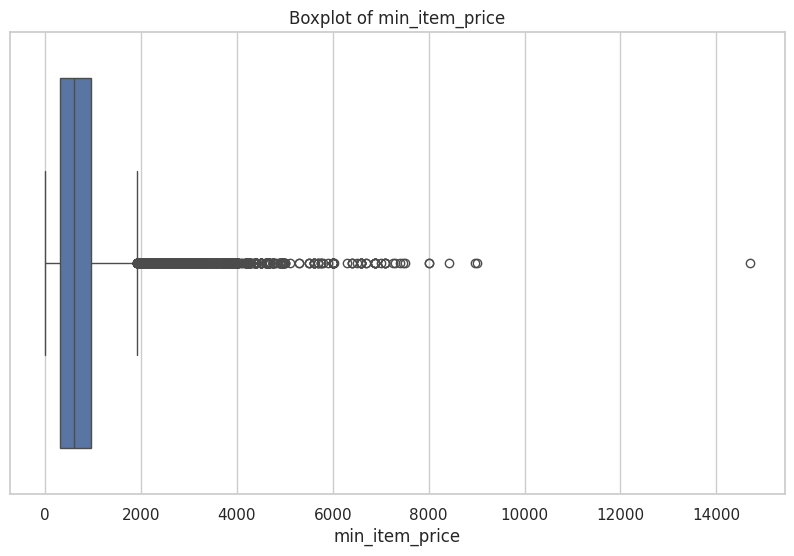

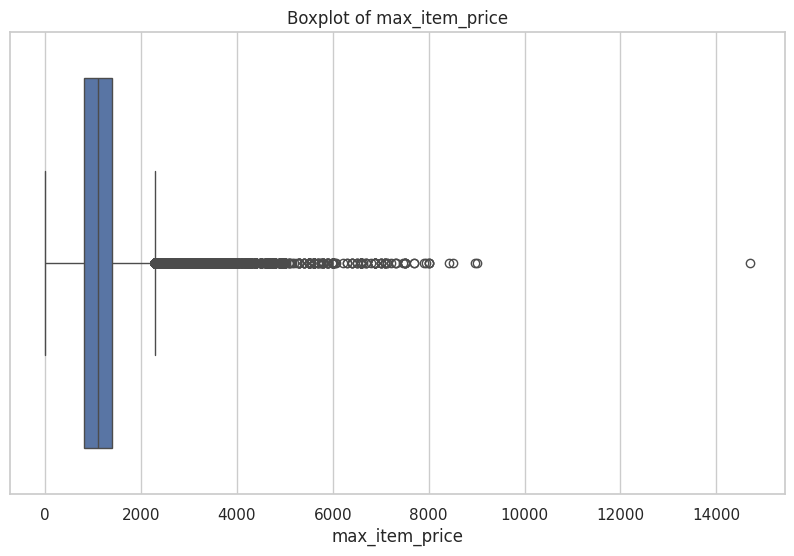

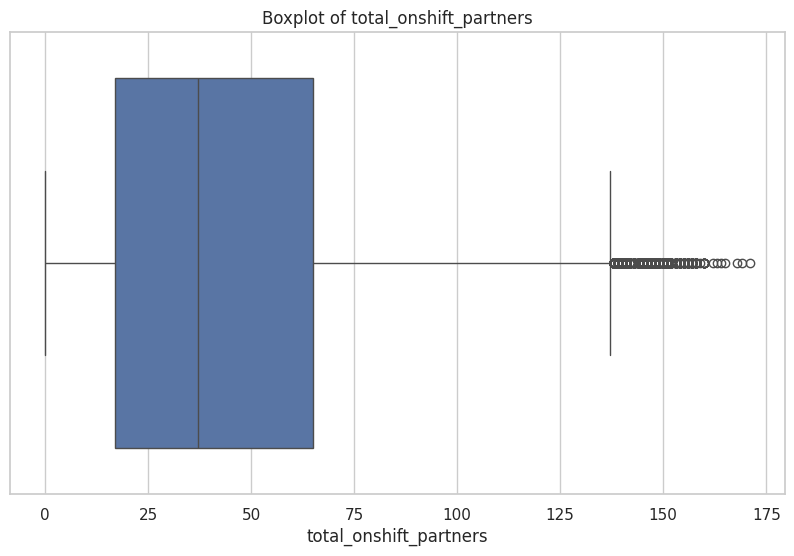

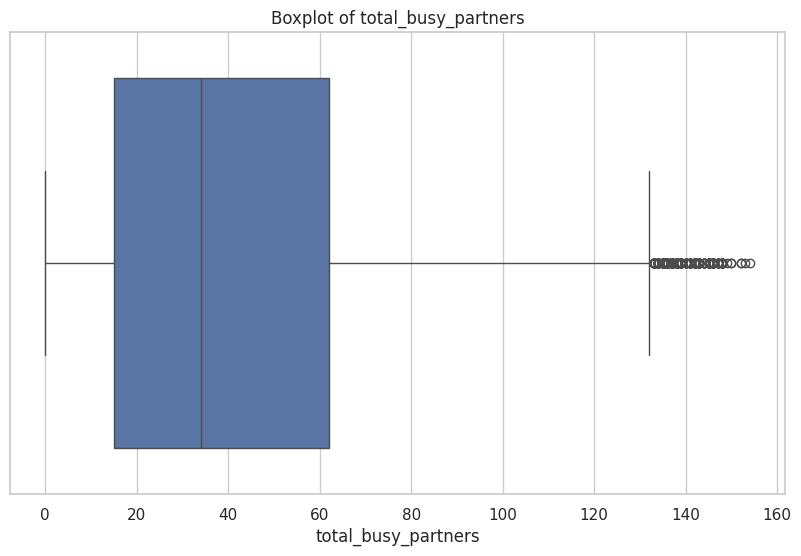

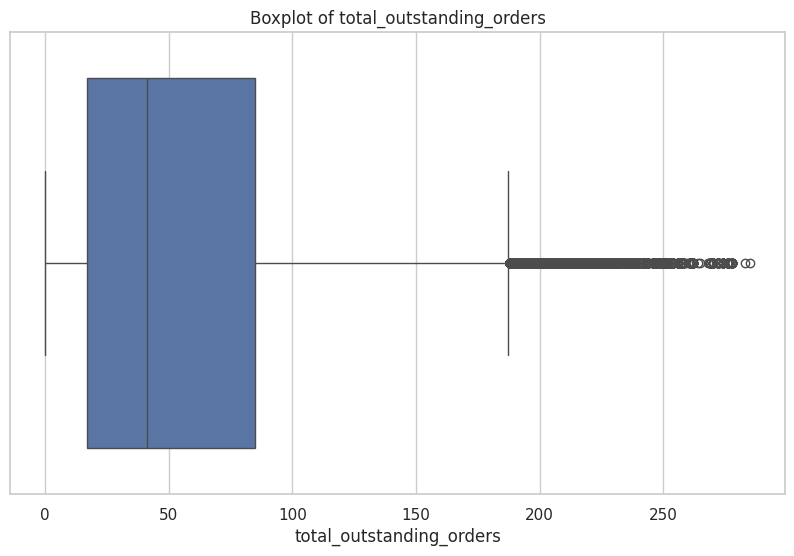

In [130]:
# Boxplot visualization for each numerical feature
for column in df_num.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df_num[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

Outlier treatment deferred – to be decided with mentor

### 2.2 Data Cleaning

Imputation methods:
1. order_protocol (categorical) = mode
2. store_primary_category (categorical) = mode
3. total_onshift_partner (count) = median (skewed distribution)
4. total_busy_partner (count) = median
5. total_outstanding_orders (count) = median
6. actual_delivery_time (timestamp) = drop rows (target variable)

In [131]:
# 1. Impute categorical feature using mode
df['order_protocol'] = df['order_protocol'].fillna(df['order_protocol'].mode()[0])
df['store_primary_category'] = df['store_primary_category'].fillna(df['store_primary_category'].mode()[0])

# 2. Impute skewed count-based features using median
df['total_onshift_partners'] = df['total_onshift_partners'].fillna(df['total_onshift_partners'].median())
df['total_busy_partners'] = df['total_busy_partners'].fillna(df['total_busy_partners'].median())
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median())
df['min_item_price'] = df['min_item_price'].fillna(df['min_item_price'].median())

# 3. Drop rows with missing actual_delivery_time
df = df.dropna(subset=['actual_delivery_time'])

In [132]:
df.isna().sum()

,0
market_id,987
created_at,0
actual_delivery_time,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


we are not using market_id for further analysis so we left it unchanged.

In [133]:
df.describe()

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,197421,197421,"197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00"
mean,2015-02-04 21:59:55.091540480,2015-02-04 22:48:23.348914176,2.87,3.20,"2,682.33",2.67,686.20,"1,159.59",44.18,41.11,56.66
min,2014-10-19 05:24:15,2015-01-21 15:58:11,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2015-01-29 02:32:38,2015-01-29 03:22:29,1.00,2.00,"1,400.00",1.00,299.00,800.00,19.00,17.00,19.00
50%,2015-02-05 03:29:06,2015-02-05 04:40:41,3.00,3.00,"2,200.00",2.00,595.00,"1,095.00",37.00,34.00,41.00
75%,2015-02-12 01:39:14,2015-02-12 02:25:26,4.00,4.00,"3,395.00",3.00,949.00,"1,395.00",62.00,59.00,80.00
max,2015-02-18 06:00:44,2015-02-19 22:45:31,7.00,411.00,"27,100.00",20.00,"14,700.00","14,700.00",171.00,154.00,285.00
std,NaN,NaN,1.51,2.67,"1,823.11",1.63,521.85,558.42,33.13,30.86,50.65


In [134]:
# Creating Column "DELIVERY TIME"

df['delivery_time'] = df['actual_delivery_time'] - df['created_at']
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557.00,1239,33.00,14.00,21.00,0 days 01:02:59
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,"1,400.00",1400,1.00,2.00,2.00,0 days 01:07:04
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.00,1,1900,1,"1,900.00",1900,1.00,0.00,0.00,0 days 00:29:41
3,3.00,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.00,6,6900,5,600.00,1800,1.00,1.00,2.00,0 days 00:51:15
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.00,3,3900,3,"1,100.00",1600,6.00,6.00,9.00,0 days 00:39:50


In [135]:
# Delivery time in minutes

df['delivery_time'] = df['delivery_time'].dt.total_seconds() / 60
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.00,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.00,4,3441,4,557.00,1239,33.00,14.00,21.00,62.98
1,2.00,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.00,1,1900,1,"1,400.00",1400,1.00,2.00,2.00,67.07
2,3.00,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,american,1.00,1,1900,1,"1,900.00",1900,1.00,0.00,0.00,29.68
3,3.00,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.00,6,6900,5,600.00,1800,1.00,1.00,2.00,51.25
4,3.00,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,american,1.00,3,3900,3,"1,100.00",1600,6.00,6.00,9.00,39.83


In [136]:
# Check for negative delivery times
df[df['delivery_time'] < 0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time


In [137]:
# Because column of ("Created_at" and "actual_delivery_time") was not used (temporary), they can be dropped

df.drop(columns=['created_at', 'actual_delivery_time', 'store_id'], inplace=True)
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.00,american,1.00,4,3441,4,557.00,1239,33.00,14.00,21.00,62.98
1,2.00,mexican,2.00,1,1900,1,"1,400.00",1400,1.00,2.00,2.00,67.07
2,3.00,american,1.00,1,1900,1,"1,900.00",1900,1.00,0.00,0.00,29.68
3,3.00,american,1.00,6,6900,5,600.00,1800,1.00,1.00,2.00,51.25
4,3.00,american,1.00,3,3900,3,"1,100.00",1600,6.00,6.00,9.00,39.83


In [138]:
df.describe()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
count,"197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00","197,421.00"
mean,2.87,3.20,"2,682.33",2.67,686.20,"1,159.59",44.18,41.11,56.66,48.47
std,1.51,2.67,"1,823.11",1.63,521.85,558.42,33.13,30.86,50.65,320.49
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.68
25%,1.00,2.00,"1,400.00",1.00,299.00,800.00,19.00,17.00,19.00,35.07
50%,3.00,3.00,"2,200.00",2.00,595.00,"1,095.00",37.00,34.00,41.00,44.33
75%,4.00,4.00,"3,395.00",3.00,949.00,"1,395.00",62.00,59.00,80.00,56.35
max,7.00,411.00,"27,100.00",20.00,"14,700.00","14,700.00",171.00,154.00,285.00,"141,947.65"


In [139]:
# Average delivery time = 46.76 minutes
# Median delivery time = 44.37 minutes

### 2.3 Explore Numerical Features

In [140]:
# Select columns only numerical data

df_duplicate = df.copy()

df_duplicate_num = df_duplicate.select_dtypes(exclude=["object", "datetime"])
df_duplicate_num.head()

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.00,4,3441,4,557.00,1239,33.00,14.00,21.00,62.98
1,2.00,1,1900,1,"1,400.00",1400,1.00,2.00,2.00,67.07
2,1.00,1,1900,1,"1,900.00",1900,1.00,0.00,0.00,29.68
3,1.00,6,6900,5,600.00,1800,1.00,1.00,2.00,51.25
4,1.00,3,3900,3,"1,100.00",1600,6.00,6.00,9.00,39.83


In [141]:
# Define a threshold for quasi-constant features (e.g., 98% similar values)
quasi_constant_threshold = 0.02

# Initialize the VarianceThreshold selector
selector = VarianceThreshold(
    threshold=quasi_constant_threshold
)

# Fit the selector to the numerical features (excluding the target variable 'SalePrice')
selector.fit(df_duplicate_num.iloc[:, :-1])

# Get the indices of features that are not quasi-constant
# These are the features we want to keep.
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features:
selected_feature_names = (
    df_duplicate_num
    .columns[selected_feature_indices]
    .tolist()
)

print(f"Selected features:")
pprint.pprint(selected_feature_names)

Selected features:
['order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']


In [142]:
selected_feature_indices

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [143]:
# Get the number of features that are not constant
print(f"Number of retained features:")
print(len(selected_feature_indices))
print("\n")
print(f"Number of quasi_constant features:")
print(len(df_duplicate_num.iloc[:, :-1].columns) - len(selected_feature_indices))

Number of retained features:
9


Number of quasi_constant features:
0


#### 2.3.1 Correlation Heatmap

Heatmap for all the remaining numerical data including the target 'Total Outstanding Orders'

In [144]:
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

In [145]:
# Define correlation matrix
corr_matrix = df_duplicate_num.corr()
corr_matrix

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
order_protocol,1.00,0.01,-0.05,-0.02,-0.04,-0.09,0.14,0.15,0.13,-0.01
total_items,0.01,1.00,0.56,0.76,-0.39,-0.06,0.03,0.03,0.03,0.00
subtotal,-0.05,0.56,1.00,0.68,0.04,0.51,0.13,0.12,0.13,0.01
num_distinct_items,-0.02,0.76,0.68,1.00,-0.45,0.04,0.06,0.06,0.07,0.01
min_item_price,-0.04,-0.39,0.04,-0.45,1.00,0.55,0.04,0.04,0.04,0.00
max_item_price,-0.09,-0.06,0.51,0.04,0.55,1.00,0.13,0.13,0.13,0.01
total_onshift_partners,0.14,0.03,0.13,0.06,0.04,0.13,1.00,0.94,0.94,0.00
total_busy_partners,0.15,0.03,0.12,0.06,0.04,0.13,0.94,1.00,0.93,0.00
total_outstanding_orders,0.13,0.03,0.13,0.07,0.04,0.13,0.94,0.93,1.00,0.01
delivery_time,-0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,1.00


In [146]:
# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
corr_matrix

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
order_protocol,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
total_items,0.00,1.00,0.56,0.76,-0.39,0.00,0.00,0.00,0.00,0.00
subtotal,0.00,0.56,1.00,0.68,0.00,0.51,0.00,0.00,0.00,0.00
num_distinct_items,0.00,0.76,0.68,1.00,-0.45,0.00,0.00,0.00,0.00,0.00
min_item_price,0.00,-0.39,0.00,-0.45,1.00,0.55,0.00,0.00,0.00,0.00
max_item_price,0.00,0.00,0.51,0.00,0.55,1.00,0.00,0.00,0.00,0.00
total_onshift_partners,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.94,0.94,0.00
total_busy_partners,0.00,0.00,0.00,0.00,0.00,0.00,0.94,1.00,0.93,0.00
total_outstanding_orders,0.00,0.00,0.00,0.00,0.00,0.00,0.94,0.93,1.00,0.00
delivery_time,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [147]:
# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False,  True,  True,
         True],
       [False, False, False, False, False, False, False, False,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
         True]])

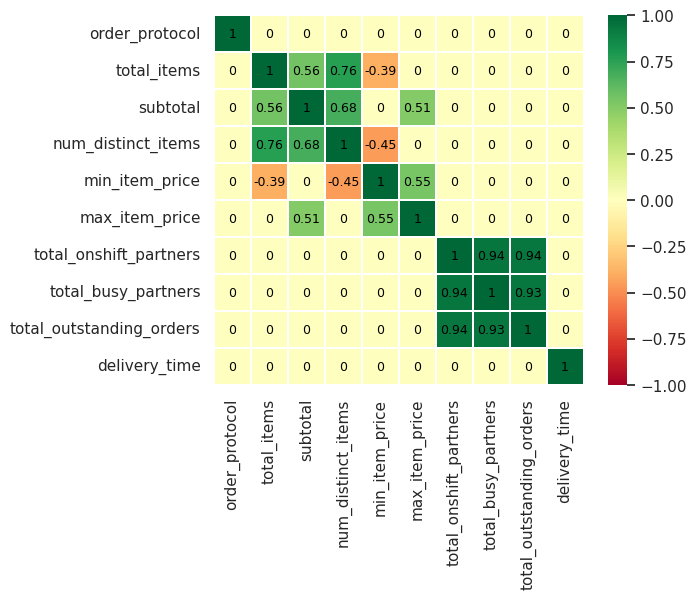

In [148]:
cmap = "RdYlGn"

# Plot the heatmap
sns.heatmap(
    data=corr_matrix,
    vmax=1.0,
    vmin=-1.0,
    linewidths=0.1,
    annot_kws={
        "size": 9,
        "color": "black"
    },
    square=True,
    cmap=cmap,
    annot=True
);

In [149]:
corr_values = df_duplicate_num.corr()['delivery_time'].drop('delivery_time')

print(corr_values.sort_values(ascending=False))

subtotal                    0.01
max_item_price              0.01
total_outstanding_orders    0.01
num_distinct_items          0.01
total_items                 0.00
min_item_price              0.00
total_busy_partners         0.00
total_onshift_partners      0.00
order_protocol             -0.01
Name: delivery_time, dtype: float64


In [150]:
# Calculate correlation with 'delivery_time' for numerical features
corr_delivery_time = df_duplicate_num.corr()["delivery_time"][:-1]

# Identify strongly correlated features (correlation coefficient >= 0.5)
strong_correlations = (
    corr_delivery_time[abs(corr_delivery_time) >= 0.5]
    .sort_values(ascending=False)
)
print(f"{len(strong_correlations)} strongly correlated features with delivery_time:")
print(strong_correlations)

print("\n-------------------------#######-------------------------\n")

# Identify moderately correlated features (0.3 <= correlation coefficient < 0.5)
moderate_correlations = (
    corr_delivery_time[(abs(corr_delivery_time) < 0.5) \
    & (abs(corr_delivery_time) >= 0.3)]
    .sort_values(ascending=False)
)
print(f"{len(moderate_correlations)} moderately correlated features with total_outstanding_orders:")
print(moderate_correlations)

0 strongly correlated features with delivery_time:
Series([], Name: delivery_time, dtype: float64)

-------------------------#######-------------------------

0 moderately correlated features with total_outstanding_orders:
Series([], Name: delivery_time, dtype: float64)


In [151]:
corr_values.index.tolist()

['order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders']

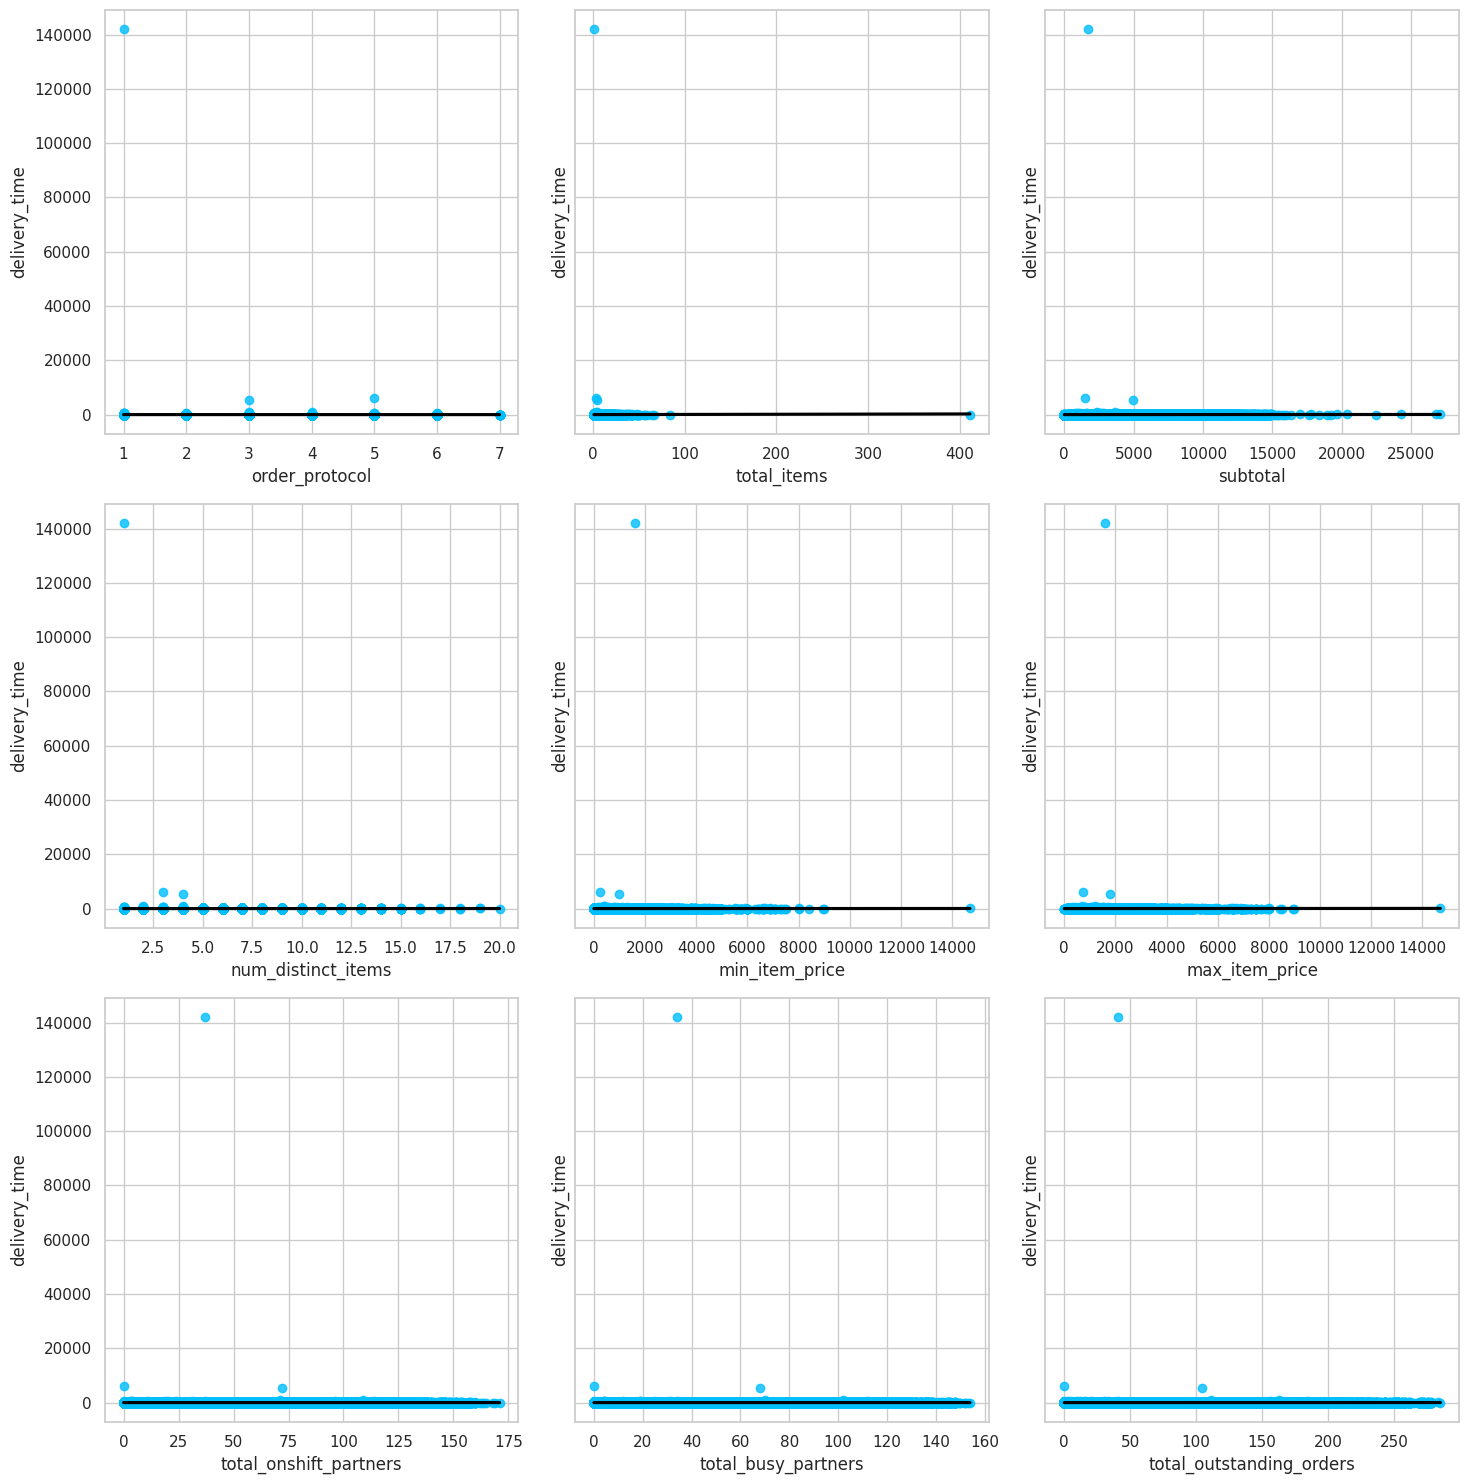

In [152]:
# Correlation Features
corr_features = corr_values.index.tolist()
corr_features.append("delivery_time")
df_corr_features = df_duplicate_num.loc[:, corr_features]

sns.set_style("whitegrid")  # define figures style

# Calculate the number of rows and columns for subplots
n_rows = (len(corr_features) -1 + 2) // 3  # Ensure enough rows
n_cols = min(3, len(corr_features) - 1)


fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(15, 5 * n_rows),
    sharey=True
)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i in range(len(corr_features) - 1):
    sns.regplot(
        x=corr_features[i],
        y="delivery_time",
        data=df_corr_features,
        ax=axes[i],
        scatter_kws={"color": "deepskyblue"},
        line_kws={"color": "black"},
    )
    axes[i].set_xlabel(corr_features[i]) # Set xlabel for each subplot


# Turn off any unused subplots
for i in range(len(corr_features) - 1, len(axes)):
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()

### 2.4. One-Hot Encoding for Categorical Feature

In [153]:
df.dtypes

,0
market_id,object
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,float64
max_item_price,int64
total_onshift_partners,float64
total_busy_partners,float64


In [154]:
# Convert numerical features with integer semantics to int
int_cols = ['order_protocol', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
df[int_cols] = df[int_cols].astype('int64')

# Ensure max_item_price is float
df['max_item_price'] = df['max_item_price'].astype('float64')

In [155]:
df.dtypes

,0
market_id,object
store_primary_category,object
order_protocol,int64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,float64
max_item_price,float64
total_onshift_partners,int64
total_busy_partners,int64


In [156]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time
0,1.00,american,1,4,3441,4,557.00,"1,239.00",33,14,21,62.98
1,2.00,mexican,2,1,1900,1,"1,400.00","1,400.00",1,2,2,67.07
2,3.00,american,1,1,1900,1,"1,900.00","1,900.00",1,0,0,29.68
3,3.00,american,1,6,6900,5,600.00,"1,800.00",1,1,2,51.25
4,3.00,american,1,3,3900,3,"1,100.00","1,600.00",6,6,9,39.83


In [157]:
# Drop market_id (not used for modeling)
df.drop(columns=['market_id'], inplace=True)

# Identify categorical features automatically
categorical_features = df.select_dtypes(include='object').columns.tolist()

# One-Hot Encoding on all categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
print("Encoded categorical features:", categorical_features)
print("Remaining object columns:", df.select_dtypes(include='object').columns.tolist())
print("Columns after encoding:\n", df.columns.tolist())

Encoded categorical features: ['store_primary_category']
Remaining object columns: []
Columns after encoding:
 ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 'delivery_time', 'store_primary_category_african', 'store_primary_category_alcohol', 'store_primary_category_alcohol-plus-food', 'store_primary_category_american', 'store_primary_category_argentine', 'store_primary_category_asian', 'store_primary_category_barbecue', 'store_primary_category_belgian', 'store_primary_category_brazilian', 'store_primary_category_breakfast', 'store_primary_category_british', 'store_primary_category_bubble-tea', 'store_primary_category_burger', 'store_primary_category_burmese', 'store_primary_category_cafe', 'store_primary_category_cajun', 'store_primary_category_caribbean', 'store_primary_category_catering', 'store_primary_category_cheese', 'store_primary_category_chines

In [158]:
df.head(10)

,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time,store_primary_category_african,store_primary_category_alcohol,store_primary_category_alcohol-plus-food,store_primary_category_american,store_primary_category_argentine,store_primary_category_asian,store_primary_category_barbecue,store_primary_category_belgian,store_primary_category_brazilian,store_primary_category_breakfast,store_primary_category_british,store_primary_category_bubble-tea,store_primary_category_burger,store_primary_category_burmese,store_primary_category_cafe,store_primary_category_cajun,store_primary_category_caribbean,store_primary_category_catering,store_primary_category_cheese,store_primary_category_chinese,store_primary_category_chocolate,store_primary_category_comfort-food,store_primary_category_convenience-store,store_primary_category_dessert,store_primary_category_dim-sum,store_primary_category_ethiopian,store_primary_category_european,store_primary_category_fast,store_primary_category_filipino,store_primary_category_french,store_primary_category_gastropub,store_primary_category_german,store_primary_category_gluten-free,store_primary_category_greek,store_primary_category_hawaiian,store_primary_category_indian,store_primary_category_indonesian,store_primary_category_irish,store_primary_category_italian,store_primary_category_japanese,store_primary_category_korean,store_primary_category_kosher,store_primary_category_latin-american,store_primary_category_lebanese,store_primary_category_malaysian,store_primary_category_mediterranean,store_primary_category_mexican,store_primary_category_middle-eastern,store_primary_category_moroccan,store_primary_category_nepalese,store_primary_category_other,store_primary_category_pakistani,store_primary_category_pasta,store_primary_category_persian,store_primary_category_peruvian,store_primary_category_pizza,store_primary_category_russian,store_primary_category_salad,store_primary_category_sandwich,store_primary_category_seafood,store_primary_category_singaporean,store_primary_category_smoothie,store_primary_category_soup,store_primary_category_southern,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,1,4,3441,4,557.00,"1,239.00",33,14,21,62.98,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,1,1900,1,"1,400.00","1,400.00",1,2,2,67.07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,1,1900,1,"1,900.00","1,900.00",1,0,0,29.68,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1,6,6900,5,600.00,"1,800.00",1,1,2,51.25,False,False,False,Tru